<a href="https://colab.research.google.com/github/arayen84/loan_status_prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Preprocessing


In [2]:
#loading the dataset to panda dataframe
load_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
type(load_dataset)

pandas.core.frame.DataFrame

In [5]:
# print first 5 rows

load_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# checking columns & rows
load_dataset.shape

(614, 13)

In [8]:
# check statistical measures
load_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# check no of missing value in the column

load_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# dropping the missing value

load_dataset=load_dataset.dropna()

In [12]:
# After dropping missing value check again

load_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# label encoding (Change the loan status from string to numeric)

load_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-14-25e75cedb3a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [15]:
load_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [19]:
# check the dependents value

load_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [20]:
# Replace the 3+ dependent value to 4

load_dataset = load_dataset.replace(to_replace='3+',value=4)

In [21]:
# After change the value check the dependents value

load_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Vizualization

<Axes: xlabel='Education', ylabel='count'>

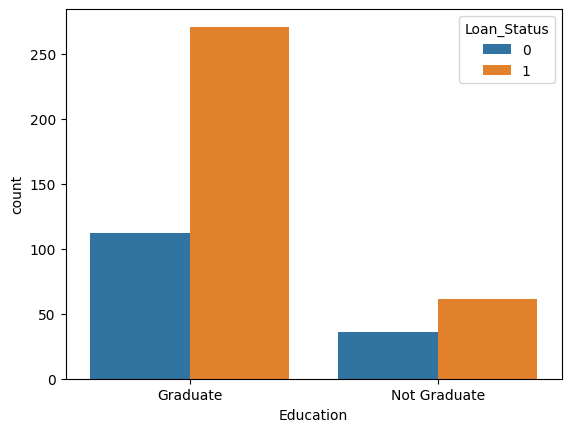

In [22]:
# Education & Loan Status

sns.countplot(x='Education',hue='Loan_Status',data=load_dataset)

<Axes: xlabel='Married', ylabel='count'>

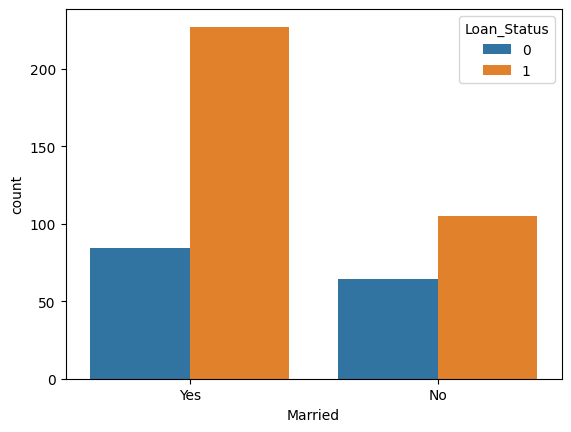

In [25]:
# Married & loan_Status
sns.countplot(x='Married',hue='Loan_Status',data=load_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

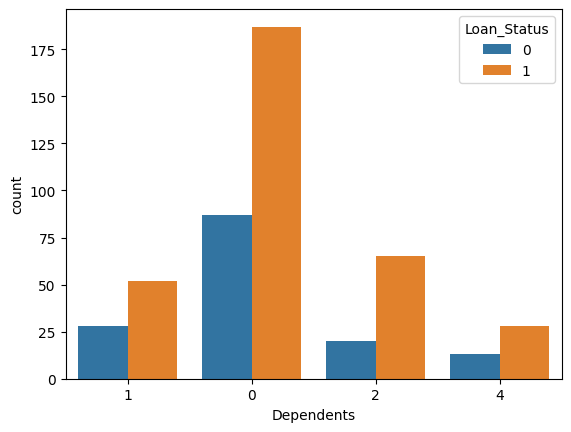

In [26]:
# Check Dependents & loan_status

sns.countplot(x='Dependents',hue='Loan_Status',data=load_dataset)

In [27]:
# Convert all categorial columns to numerical values

load_dataset.replace({'Gender':{'Male':0,'Female':1},
                      'Married':{'No':0,'Yes':1},
                      'Education':{'Not Graduate':0,'Graduate':1},
                      'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)


In [28]:
load_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [30]:
# Separating the data and label

X = load_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)

Y = load_dataset['Loan_Status']

In [31]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [33]:
print(X.shape)

(480, 11)


In [35]:
print(X_train.shape)

(432, 11)


In [38]:
print(X_test.shape)

(48, 11)


Training The Model:

Support Vector Machine Model

In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
# training the support Vector Machine Model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [41]:
# Accuracy score on training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [42]:
print('Accuracy on training data :',training_data_accuracy)

Accuracy on training data : 0.7476851851851852


In [43]:
# Accuracy on testing data

X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [44]:
print('Accuracy on testing data :',testing_data_accuracy)

Accuracy on testing data : 0.8333333333333334
